# Final Model Evaluation

In [ ]:
import logging, sys
logging.disable(sys.maxsize)
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
! pip install yellowbrick
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate
from yellowbrick.classifier import ClassificationReport, ClassPredictionError, ConfusionMatrix, ROCAUC, PrecisionRecallCurve
from sklearn.metrics import classification_report
import random
random.seed(42)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 9.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
X_train = pd.read_csv("x_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("x_test.csv")
y_test = pd.read_csv("y_test.csv")

df = pd.read_csv("preprocessed.csv")
y = df.family
X = df.drop(["family", "label"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
classes = y_train.value_counts().index.tolist()
classes

['Benign', 'Spoofing', 'BruteForce', 'Web', 'DDoS', 'DoS', 'Recon', 'Mirai']

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 1, min_samples_split =  10, splitter =  'best')
y_test_pred = model.fit(X_train, y_train).predict(X_test)
y_train_pred = model.fit(X_train, y_train).predict(X_train)

In [ ]:
#Clasification report of test data
print("--------------------------- TEST DATA -------------------")
print(classification_report(y_test, y_test_pred, target_names=classes))
#Clasification report of training data
print("--------------------------- TRAIN DATA -------------------")
print(classification_report(y_train, y_train_pred, target_names=classes))

              precision    recall  f1-score   support

      Benign       0.72      0.83      0.77       180
    Spoofing       0.61      0.83      0.70       186
  BruteForce       1.00      1.00      1.00       151
         Web       1.00      1.00      1.00       152
        DDoS       0.99      1.00      0.99       156
         DoS       0.95      0.65      0.77       182
       Recon       0.89      0.75      0.82       186
       Mirai       0.73      0.69      0.71       176

    accuracy                           0.83      1369
   macro avg       0.86      0.84      0.85      1369
weighted avg       0.85      0.83      0.84      1369

              precision    recall  f1-score   support

      Benign       0.79      0.90      0.84       770
    Spoofing       0.61      0.86      0.72       710
  BruteForce       1.00      1.00      1.00       659
         Web       1.00      1.00      1.00       635
        DDoS       0.99      1.00      1.00       616
         DoS       0.97 

0.8319941563184806

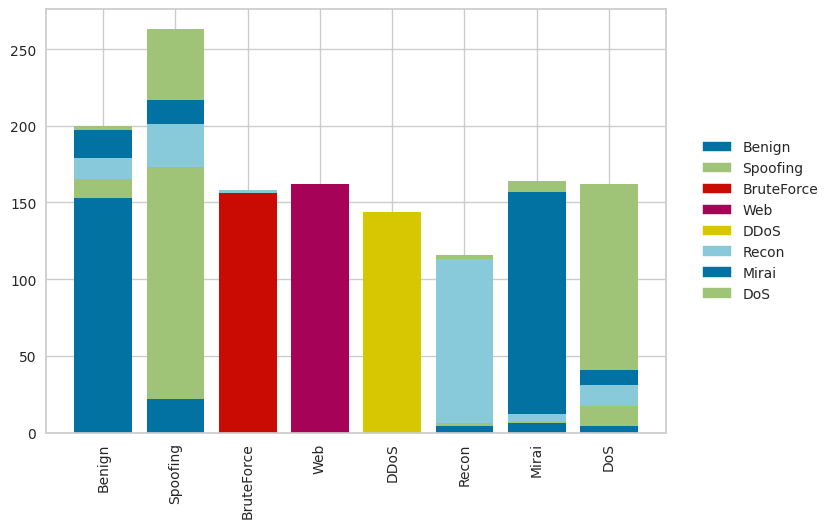

In [ ]:
# ClassPredictionError
visualizer = ClassPredictionError(model, classes=classes)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test) 

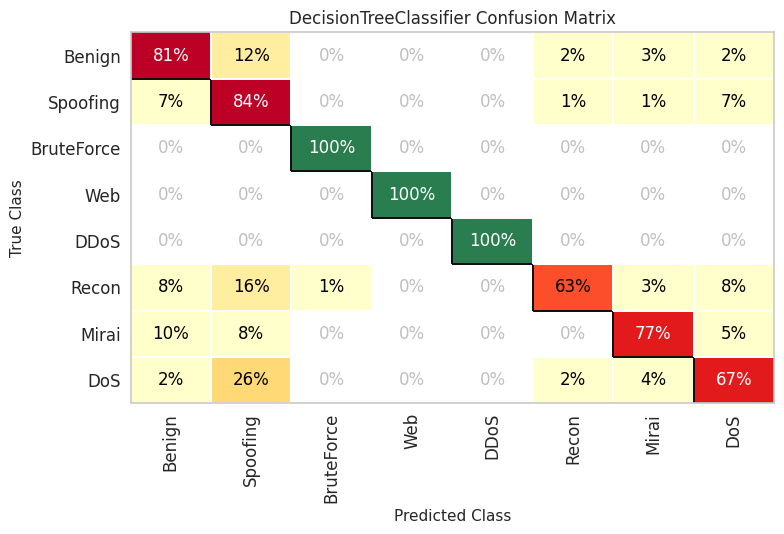

<AxesSubplot: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
visualizer = ConfusionMatrix(model, classes=classes, percent=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof() 

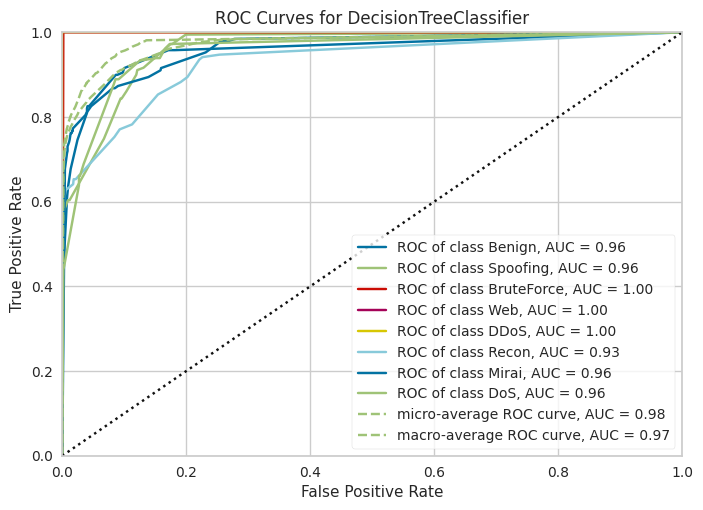

<AxesSubplot: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(model, classes=classes)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.poof() 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3a3c41eb-c99a-4899-842d-6de17d10af25' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>